## The aim here is to find most occuring tags for products from the Amazon product review data so as to list certain qualities of a product to a user who is planing to buy the product. This will help him to filter down reviews according to his choice and read only those reviews which contains that particular which the user selected

# Import Libraries

In [351]:
import nltk
from nltk import FreqDist
nltk.download('stopwords')
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

[nltk_data] Downloading package stopwords to C:\Users\Vaibhav
[nltk_data]     Mangla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Read data into dataframe

In [420]:
df = pd.read_csv(r'C:/Users/Vaibhav Mangla/Downloads/archive/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df.head(4)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batterie...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9P0O/,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.,... 3 of them and one of the item is bad quality. Is missing backup spring so I have ...,Byger yang,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO/,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteri..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batterie...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9P0O/,Bulk is always the less expensive way to go for products like these,... always the less expensive way to go for products like,ByMG,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO/,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteri..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batterie...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9P0O/,Well they are not Duracell but for the price i am happy.,... are not Duracell but for the price i am happy.,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO/,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteri..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,

In [354]:
df.columns



Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

# Remove unwanted columns
#### Removing columns like id, dates, urls and username etc which are not required for analysing the reviews

In [421]:
df = df.drop(['id', 'dateAdded', 'dateUpdated', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs','reviews.username', 'sourceURLs'],axis=1)

In [23]:
df.head(3)

,name,reviews.doRecommend,reviews.text,reviews.title
0,AmazonBasics AAA Performance Alkaline Batteries (36 Count),NaN,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.,... 3 of them and one of the item is bad quality. Is missing backup spring so I have ...
1,AmazonBasics AAA Performance Alkaline Batteries (36 Count),NaN,Bulk is always the less expensive way to go for products like these,... always the less expensive way to go for products like
2,AmazonBasics AAA Performance Alkaline Batteries (36 Count),NaN,Well they are not Duracell but for the price i am happy.,... are not Duracell but for the price i am happy.


# Check if the reviews column has any null values or not. Remove if any
#### We do not have null values in reviews column but 'doRecommend' column is full of null values

In [358]:
mis_val = df.isnull().sum()
mis_val

name                       0
reviews.doRecommend    12246
reviews.text               0
reviews.title              0
dtype: int64

# People often use short hand expressions for expressions hence we would like to expand them up. 
### This is important because the meaning of a sentence becomes completely opposite if we remove words like did'nt without expanding them.
##### Example - 'i did'nt like them' . If we remove 'did'nt' in text cleaning step then the sentence would become 'i like them'

In [422]:
contractions = {
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd've": "he would have",
"how'd": "how did",
"how's": "how is",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"that'd": "that had",
"they're": "they are",
"wasn't": "was not",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what're": "what are",
"what've": "what have",
"when've": "when have",
"where'd": "where did",
"where've": "where have",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"wouldn't": "would not",
"wouldn't've": "would not have",
}


def uncontract(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return(text)

## Some text cleaning, expanding short expressions, removing any word not starting with alphabets

In [423]:
df['reviews.text'] = df['reviews.text'].str.replace(".", "")

In [424]:
df['reviews.text'] = df['reviews.text'].apply(lambda x :uncontract(x))

In [425]:
df['reviews.text'] = df['reviews.text'].str.replace("[^a-zA-Z#]", " ")

## Selecting a particular product for further analysis

In [426]:
df = df[df.name == 'AmazonBasics AAA Performance Alkaline Batteries (36 Count)']

In [405]:
df

,name,reviews.doRecommend,reviews.text,reviews.title
0,AmazonBasics AAA Performance Alkaline Batteries (36 Count),NaN,order them and one the item bad quality missing backup spring have put pcs aluminum make the battery work,... 3 of them and one of the item is bad quality. Is missing backup spring so I have ...
1,AmazonBasics AAA Performance Alkaline Batteries (36 Count),NaN,Bulk always the less expensive way for products like these,... always the less expensive way to go for products like
2,AmazonBasics AAA Performance Alkaline Batteries (36 Count),NaN,Well they are not Duracell but for the price happy,... are not Duracell but for the price i am happy.
3,AmazonBasics AAA Performance Alkaline Batteries (36 Count),NaN,Seem work well name brand batteries much better price,... as well as name brand batteries at a much better
4,AmazonBasics AAA Performance Alkaline Batteries (36 Count),NaN,These batteries are very long lasting the price great,... batteries are very long lasting the price is great.
5,AmazonBasics AAA Performance Alkaline Batteries (36 Count),NaN,Bought lot batteries for Christmas and the AmazonBasics Cell have been good have not noticed difference between the brand name batteries and the Amazon Basic brand Just lot easier purchase and hav...,... batteries for Christmas and the AmazonBasics Cell have been good. I haven't noticed a difference between the brand ...
6,AmazonBasics AAA Performance Alkaline Batteries (36 Count),NaN,ive not had any problame with these batteries have ordered them the past been very pleased,... batteries have ordered them in the past been very pleased.
7,AmazonBasics AAA Performance Alkaline Batteries (36 Count),NaN,Well you are looking for cheap non-rechargeable batteries that last quite while then these are perfect Nothing more say,... batteries that last quite a while then these are perfect. Nothing more to say
8,AmazonBasics AAA Performance Alkaline Batteries (36 Count),NaN,"These not hold the amount high power juice like energizer duracell, but they are half the price",... do not hold the amount of high power juice like energizer or duracell
9,AmazonBasics AAA Performance Alkaline Batteries (36 Count),NaN,AmazonBasics AAA batteries have done well appear have good shelf life will buy them again,... done well by me appear to have a good shelf life


## Using NLTK for removal of stopwords from the reviews , matplotlib to visualize most frequent terms/ngrams

In [427]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [439]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Defining a function to remove stop words, tokeninzing the reviews, and converting every word to lowercase

In [429]:
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df['reviews.text'] = df['reviews.text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['reviews.text']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

In [430]:
tokens_list = [nltk.word_tokenize(rev) for rev in reviews] # list of tokens for each review

## Generating bigrams out of tokens extracted from each review and creating a list of all the bigrams combined to be used for visualization 

In [431]:
bgs_list= [nltk.bigrams(tokens) for tokens in tokens_list]

In [410]:
list(bgs_list[1])

[('bulk', 'always'),
 ('always', 'less'),
 ('less', 'expensive'),
 ('expensive', 'way'),
 ('way', 'products'),
 ('products', 'like')]

In [432]:
list_of_bigrams = [list(t) for t in bgs_list]
all_bigrams = [item for sublist in list_of_bigrams for item in sublist]

In [440]:
all_bigrams


[('order', 'one'),
 ('one', 'item'),
 ('item', 'bad'),
 ('bad', 'quality'),
 ('quality', 'missing'),
 ('missing', 'backup'),
 ('backup', 'spring'),
 ('spring', 'put'),
 ('put', 'pcs'),
 ('pcs', 'aluminum'),
 ('aluminum', 'make'),
 ('make', 'battery'),
 ('battery', 'work'),
 ('bulk', 'always'),
 ('always', 'less'),
 ('less', 'expensive'),
 ('expensive', 'way'),
 ('way', 'products'),
 ('products', 'like'),
 ('well', 'duracell'),
 ('duracell', 'price'),
 ('price', 'happy'),
 ('seem', 'work'),
 ('work', 'well'),
 ('well', 'name'),
 ('name', 'brand'),
 ('brand', 'batteries'),
 ('batteries', 'much'),
 ('much', 'better'),
 ('better', 'price'),
 ('these', 'batteries'),
 ('batteries', 'long'),
 ('long', 'lasting'),
 ('lasting', 'price'),
 ('price', 'great'),
 ('bought', 'lot'),
 ('lot', 'batteries'),
 ('batteries', 'christmas'),
 ('christmas', 'amazonbasics'),
 ('amazonbasics', 'cell'),
 ('cell', 'good'),
 ('good', 'noticed'),
 ('noticed', 'difference'),
 ('difference', 'brand'),
 ('brand', 'na

## Defining function to plot barplot of the most common bigrams appearing in the set of all the reviews for the product we have selected earlier. 
#### This uses FreqDist function in nltk. Function will display 15 most frequest bigrams by default.

In [443]:
def freq_bigrams(x, terms = 15):
  #all_bigrams = [bgm for list(bgm) in list(x)]
  #all_words = all_words.split()

  fdist = FreqDist(x)

  bigrams_df = pd.DataFrame({'bigram':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = bigrams_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(25,5))
  ax = sns.barplot(data=d, x= "bigram", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()
  return d
    

## The below plot depicts the most frequent bigrams occuring the in the data set for the product we have chosen. 

#### We can see that some bigram contains 'Determiners' hence we need some cleaning to depict 'Nouns', 'Verbs', 'Adverbs' only as they provide most useful information regarding quality of product


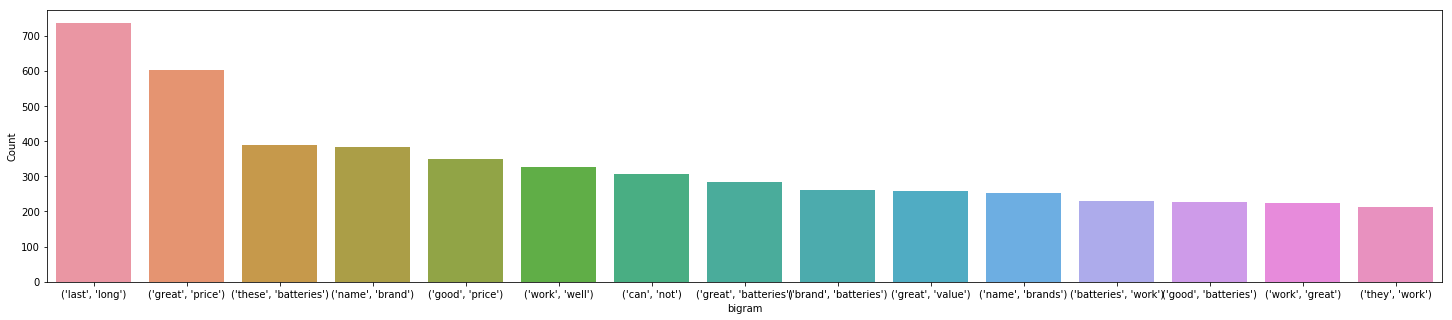

In [444]:
d = freq_bigrams(all_bigrams)

In [339]:
d

,bigram,count
187,"(last, long)",739
167,"(great, price)",607
24,"(these, batteries)",395
19,"(name, brand)",384
149,"(good, price)",354
17,"(work, well)",331
1528,"(great, batteries)",287
20,"(brand, batteries)",263
1816,"(great, value)",263
459,"(name, brands)",255


## We will use spacy pyhton librabry for POS tagging and determine what parts os speech does our bigrams have

#### We will download the already trained pipline provided by spacy to perform POS tagging 

In [86]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Error processing line 7 of C:\Users\Vaibhav Mangla\Anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\Vaibhav Mangla\Anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored
You are using pip version 18.0, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
Error processing line 7 of C:\Users\Vaibhav Mangla\Anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Users\Vaibhav Mangla\Anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored
C:\Users\Vaibhav Mangla\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1t

### We load the model downloaded above and disable certain steps of the pipeline like 'Name Entity Recognition' etc so as to optimize the execution times of the pipeline.

#### Also defined a function which will pick each bigram from a review and remove that if it has any deteminers like 'the', 'these' etc.

In [435]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization_for_bigrams(texts, tags=['NOUN','ADJ','ADV']): # filter noun and adjective
        output = []
        doc = nlp(" ".join(texts)) 
        append=False
        for token in doc:
            if token.pos_ in tags:
                #output.append(doc)
                append = True
            else:
                append = False
                break
        if append:
            output.append(doc)    
        if output:
            return output

In [437]:
#all_bigrams
lemmatization_for_bigrams_wid_noun_adj_adv = [lemmatization_for_bigrams(list(item)) for item in all_bigrams if list(item)]

## We use the same ploting function for refined set of bgrams to detemine their count and we can see that we get useful pieces of information regarding the qualities of the product

#### Here we can see most reviews contain ('last','long'), ('great','price'), ('name',brand'), ('good','price') which depicts that the batteries last long, prices are great, people also comparing them to brands like Duracell

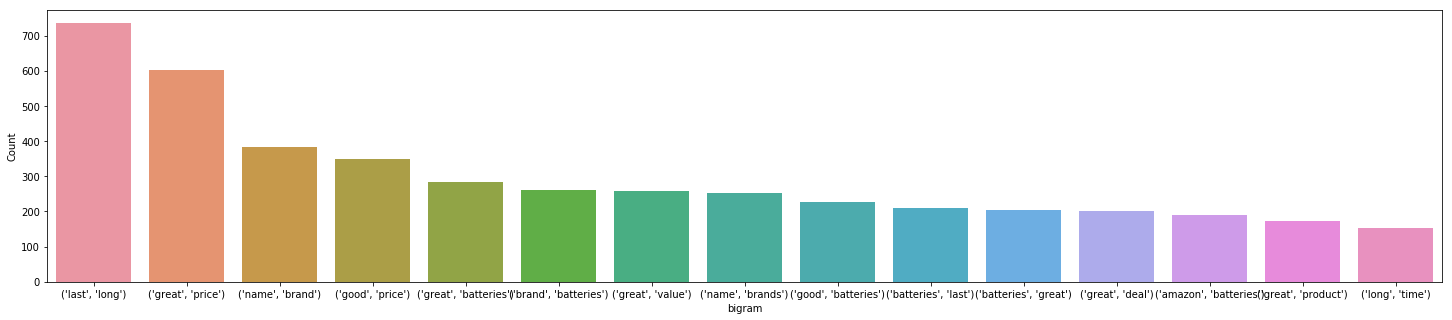

In [438]:
cnt = freq_bigrams([tuple(str(item[0]).split()) for item in lemmatization_for_bigrams_wid_noun_adj_adv if item],terms=15)

In [447]:
cnt

,bigram,count
82,"(last, long)",736
74,"(great, price)",603
11,"(name, brand)",383
67,"(good, price)",350
640,"(great, batteries)",285
12,"(brand, batteries)",262
750,"(great, value)",259
205,"(name, brands)",253
189,"(good, batteries)",226
35,"(batteries, last)",210


# This helps us to determine certain qualities of the product which are most discussed by people. We can determine the useful bigrams from the above Dataframe and search out set of reviews containing these useful bigrams. This will help us to display all the reviews available for a particular tag that user selects